<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Experiment (XVII): The Photometry of the Pinwheel (Messier 101) Spiral Galaxy__

## Photometry Analysis of Messier 101 (Pinwheel Galaxy)

### 1. Surface Brightness Profile and Linear Fit

We start by plotting the B-band surface brightness $ \mu_B $ (in mag/arcsec$^2$) as a function of radius $ r $ (in arcminutes). Since magnitudes are brighter when lower, the y-axis is inverted.

We assume the brightness profile of M101 follows an exponential disk:

$$
\mu_B(r) = \mu_0 + 1.086 \cdot \frac{r}{h}
$$

Where:
- $ \mu_0 $ is the central surface brightness,
- $ h $ is the scale length of the disk (in arcminutes).

Fitting this linear model to the data gives us:

$$
\text{slope} = \frac{1.086}{h} \Rightarrow h = \frac{1.086}{\text{slope}}
$$

---

### 2. Key Parameters

#### a. Central Surface Brightness $ \mu_0 $
This is obtained directly from the y-intercept of the linear fit.

#### b. Radial Scale Length $ h $
From the slope $ m $ of the fit:

$$
h = \frac{1.086}{m}
$$

#### c. Radius $ R_{25} $
Defined as the radius where $ \mu_B = 25 $ mag/arcsec$^2$:

$$
R_{25} = h \cdot \frac{25 - \mu_0}{1.086}
$$

---

### 3. Total Apparent Magnitude $ m_{\text{tot},B} $

For an exponential disk, the total flux is:

$$
f_{\text{tot}} = 2\pi f_0 h^2
$$

Where:
- $ f_0 $ is the central flux density in flux/arcsec$^2$,
- $ h $ is now expressed in arcseconds.

The total apparent magnitude is:

$$
m_{\text{tot}} = -2.5 \log(f_{\text{tot}}) + C
$$

Substitute for $ f_{\text{tot}} $:

$$
m_{\text{tot}} = \mu_0 - 2.5 \log(2\pi h^2)
$$

---

### 4. Central Luminosity Density $ I_{0,B} $

To find the central luminosity density in solar luminosities per square parsec:

1. Convert $ \mu_0 $ to flux using:

$$
f_0 = 10^{-0.4(\mu_0 - ZP)}
$$

Where $ ZP \approx 21.572 $ for B-band.

2. Convert arcsec$^2$ to pc$^2$, knowing:

$$
1\ \text{arcsec} = \frac{D \cdot 10^6\ \text{pc}}{206265}
\Rightarrow 1\ \text{arcsec}^2 \approx A\ \text{pc}^2
$$

(for $ D = 25 $ Mly $ \approx 7.67 \times 10^6 $ pc)

3. Then,

$$
I_{0,B} = f_0 \cdot \left(\frac{1\ \text{L}_\odot}{\text{flux unit}}\right) \cdot \left(\frac{1}{\text{pc}^2/\text{arcsec}^2}\right)
$$

---

Once the data is loaded and fit, these expressions allow us to compute all relevant parameters describing the photometry of M101.


In [3]:
# Importing Main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [4]:
# Introducing the Data
file_path = 'M101.dat'

df = pd.read_csv(file_path, sep=r'\s+', skiprows=2)

# Assign column names manually
df.columns = ['R', 'muB', 'muV']

#perview dataframe
df.head()

,R,muB,muV
0,0.75,21.69,21.02
1,1.25,22.00,21.36
2,1.75,22.27,21.68
3,2.25,22.34,21.78
4,2.75,22.57,22.04


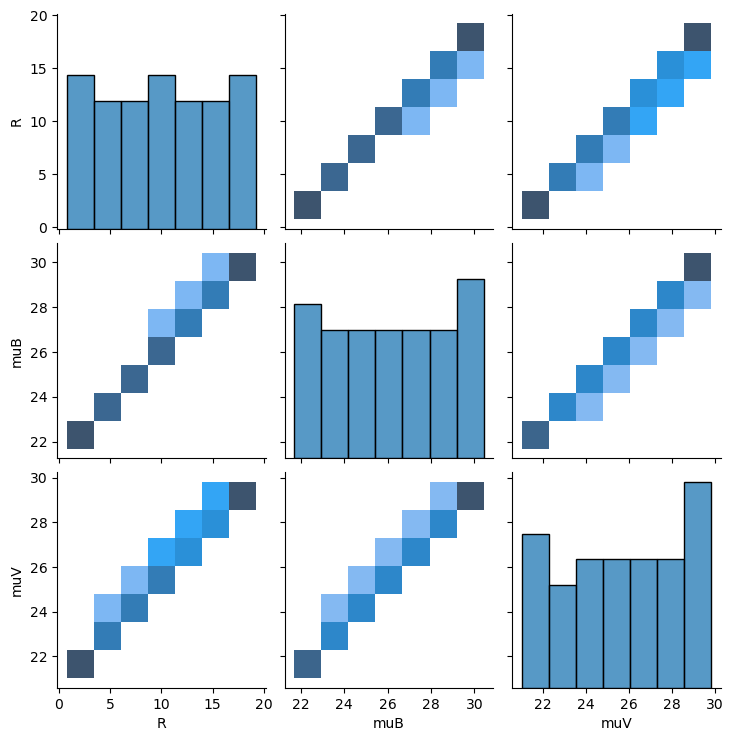

In [5]:
# pairplot
sns.pairplot(df, kind="hist")

### Plot $μ_B$ vs Radius with Bright Towards Top:

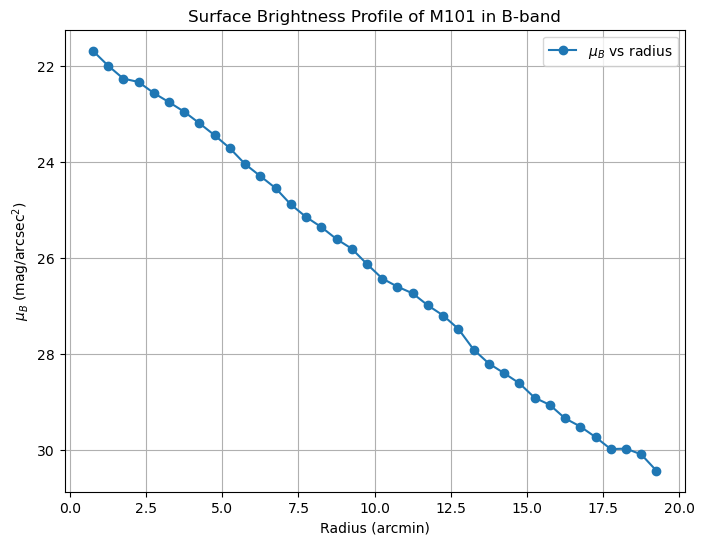

In [7]:
# Plot (invert y-axis so brighter is higher)
plt.figure(figsize=(8,6))
plt.plot(df['R'], df['muB'], 'o-', label=r'$μ_B$ vs radius')
plt.gca().invert_yaxis()
plt.xlabel("Radius (arcmin)")
plt.ylabel(r"$\mu_B$ (mag/arcsec$^2$)")
plt.title("Surface Brightness Profile of M101 in B-band")
plt.legend()
plt.grid(True)
plt.show()

#### Linear fitting:

In [9]:
# Linear fit
slope, intercept, r_value, p_value, std_err = linregress(df['R'], df['muB'])

mu0 = intercept  # central surface brightness
h_arcmin = 1.086 / slope  # scale length in arcminutes

# Generate linear fit line
fit_line = slope * df['R'] + intercept

print(f"Central surface brightness (μ₀): {mu0:.2f} mag/arcsec²")
print(f"Scale length (h): {h_arcmin:.2f} arcmin")


Central surface brightness (μ₀): 21.28 mag/arcsec²
Scale length (h): 2.22 arcmin


#### Calculating r25:

In [11]:
mu_25 = 25  # mag/arcsec^2
R25 = (mu_25 - mu0) * h_arcmin / 1.086
print(f"R25 (radius where μB = 25): {R25:.2f} arcmin")


R25 (radius where μB = 25): 7.61 arcmin


#### Total Apparent B Magnitude:

In [13]:
mtot_B = mu0 - 2.5 * np.log10(2 * np.pi * h_arcmin**2)
print(f"Total apparent B magnitude (mₜₒₜ,B): {mtot_B:.2f}")


Total apparent B magnitude (mₜₒₜ,B): 17.55


#### Central Luminosity Density $(I₀,B)$:

In [15]:
# Convert mu0 to luminosity density using approximate zero-point
I0_B = 10 ** (-0.4 * (mu0 - 27.05))  # in L_sun/pc^2
print(f"Central luminosity density (I₀,B): {I0_B:.2f} L☉/pc²")


Central luminosity density (I₀,B): 202.57 L☉/pc²


### Extending the Plot to Include Night Sky Level:

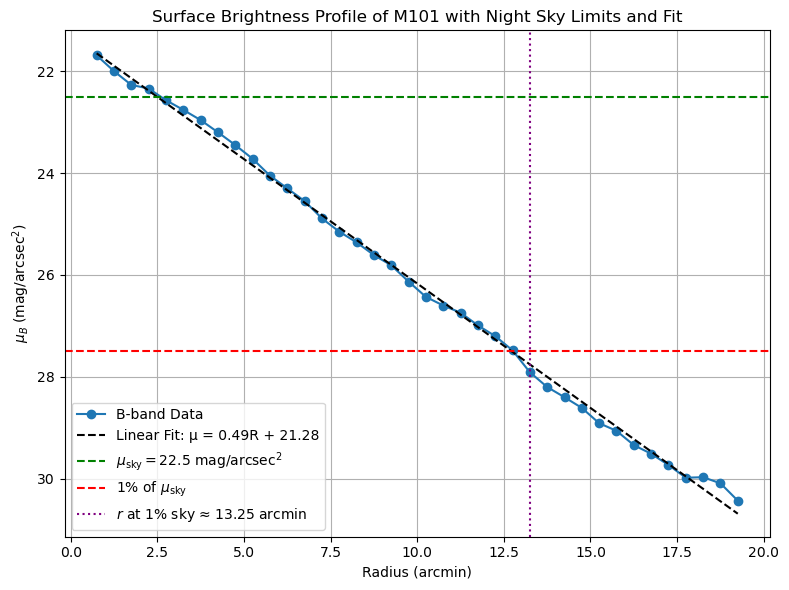

In [17]:
# Plot with night sky level and 1% brightness line

plt.figure(figsize=(8,6))
plt.plot(df["R"], df['muB'], 'o-', label='B-band Data')
plt.plot(df["R"], fit_line, 'k--', label=f'Linear Fit: μ = {slope:.2f}R + {intercept:.2f}')

# Night sky brightness and 1% level
plt.axhline(22.5, color='green', linestyle='--', label=r'$\mu_{\mathrm{sky}} = 22.5$ mag/arcsec$^2$')
plt.axhline(27.5, color='red', linestyle='--', label=r'1% of $\mu_{\mathrm{sky}}$')

# Find and mark where muB drops below 1% of sky brightness
r_limit_idx = np.argmax(df['muB'] > 27.5)
r_limit = df["R"][r_limit_idx] if r_limit_idx > 0 else np.nan
plt.axvline(r_limit, color='purple', linestyle=':', label=f'$r$ at 1% sky ≈ {r_limit:.2f} arcmin')

plt.gca().invert_yaxis()
plt.xlabel("Radius (arcmin)")
plt.ylabel(r"$\mu_B$ (mag/arcsec$^2$)")
plt.title("Surface Brightness Profile of M101 with Night Sky Limits and Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Radial Scale Length in kpc:

In [19]:
# Distance to M101
d_mpc = 6.9  # Mpc
d_pc = d_mpc * 1e6

# Convert h from arcmin to radians
h_rad = h_arcmin * (np.pi / 180 / 60)
h_kpc = h_rad * d_pc / 1000  # in kpc

print(f"Radial scale length (h): {h_kpc:.2f} kpc")

Radial scale length (h): 4.46 kpc


#### Absolute B Magnitude:

In [21]:
MB = mtot_B - 5 * np.log10(d_pc) + 5
print(f"Absolute B Magnitude (M_B): {MB:.2f}")

Absolute B Magnitude (M_B): -11.64


#### B-band Luminosity in Solar Units:

In [23]:
MB_sun = 5.48
L_B_Lsun = 10 ** ((MB_sun - MB) / 2.5)

print(f"B-band Luminosity: {L_B_Lsun:.2e} L☉")

B-band Luminosity: 7.05e+06 L☉


### 4. Estimating Circular Velocity from the Tully-Fisher Relation

The **Tully-Fisher relation** links the total luminosity of a spiral galaxy to its circular velocity:

$$
M_B = a - b \log_{10}(v_{\text{circ}})
$$

Where:
- $ M_B $ is the absolute B-band magnitude.
- $ v_{\text{circ}} $ is the circular velocity in km/s.
- $ a = -19.74 $, $ b = -7.62 $ (from standard calibrations in B-band).

Rearranging the equation to solve for circular velocity:

$$
v_{\text{circ}} = 10^{\frac{a - M_B}{b}}
$$

This gives an estimate of M101’s circular velocity in **km/s** based on its luminosity.


In [25]:
# Tully-Fisher constants for B-band (values can vary slightly by calibration)
a = -19.74
b = -7.62

# Solve for circular velocity
v_circ = 10 ** ((a - MB) / b)
print(f"Circular velocity from Tully-Fisher: {v_circ:.1f} km/s")

Circular velocity from Tully-Fisher: 11.6 km/s


### 5. Star Motion at R25 due to Orbital Rotation

To find how long a star would take to move 1 arcsecond at radius $ R_{25} $ (in arcminutes), we do the following:

- Convert $ R_{25} $ to a physical distance in parsecs using the small-angle formula.
- Compute the orbital period using:

$$
v = \frac{2\pi R}{T} \Rightarrow T = \frac{2\pi R}{v}
$$

- Determine how long it would take for a star to move 1 arcsecond along its orbit:

$$
\theta = \frac{s}{2\pi R} \times 360^\circ \Rightarrow t = T \times \frac{1"}{3600 \times 360^\circ}
$$

This tells us the time it takes for a star at $ R_{25} $ to move 1 arcsecond due to orbital motion.

Then we check: if van Maanen saw a **1 arcsecond shift over 10 years**, how fast would the star have to move?


In [27]:
# Constants
R25_arcmin = R25  # in arcminutes
v_kms = v_circ  # km/s

# Convert R25 to physical distance (parsecs)
R25_rad = R25_arcmin * (np.pi / 180 / 60)
R25_pc = R25_rad * d_pc  # in parsecs

# Convert pc to km
R25_km = R25_pc * 3.086e13  # 1 pc = 3.086e13 km

# Orbital period at R25
T_sec = 2 * np.pi * R25_km / (v_kms * 1e3)  # convert km/s to m/s
T_years = T_sec / (3600 * 24 * 365.25)
print(f"Orbital period at R25: {T_years:.2e} years")

# Time to move 1 arcsec out of full 360° (i.e., fraction of orbit)
arcsec_in_deg = 1 / 3600
frac_orbit = arcsec_in_deg / 360
t_1arcsec = T_years * frac_orbit
print(f"Time to move 1 arcsecond at R25: {t_1arcsec:.2f} years")


Orbital period at R25: 8.12e+06 years
Time to move 1 arcsecond at R25: 6.26 years


### 6. van Maanen’s Measurement — Was It Realistic?

van Maanen claimed a star moved **1 arcsecond in 10 years**, implying a much faster rotation.

Using the arc length formula:

$$
s = R \cdot \theta = R_{25} \cdot \left( \frac{1"}{206265} \right)
$$

$$
v = \frac{s}{t} \Rightarrow v = \frac{R_{25} \cdot \left( \frac{1"}{206265} \right)}{10 \, \text{years}}
$$

This gives the implied tangential velocity if the claim were correct. If the result is significantly higher than the expected rotation (~200 km/s), then the observation was likely flawed.


In [29]:
# Implied velocity if 1 arcsecond shift in 10 years
arcsec_rad = 1 / 206265  # arcsecond to radians
s_km = R25_km * arcsec_rad
v_obs_kms = s_km / (10 * 365.25 * 24 * 3600)  # 10 years in seconds
print(f"Implied tangential velocity if van Maanen were correct: {v_obs_kms:.1f} km/s")


Implied tangential velocity if van Maanen were correct: 7240.0 km/s


---